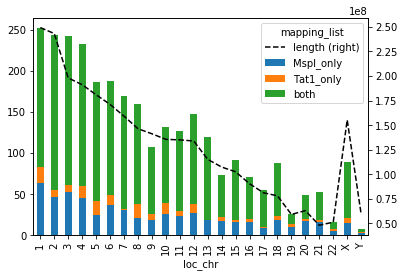

In [9]:
# Fig 1d (barcode distribution across the chromosomes)
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

GL_gDNA_cDNA_input = pd.read_csv('/Users/qw2/Documents/Sanger/GL_analysis/00_Felicity/R_metadata_input_name.csv', sep=',')
GL_gDNA_cDNA_input['total_MspI'] = GL_gDNA_cDNA_input['cutting_MspI high'] + GL_gDNA_cDNA_input['cutting_MspI low'] + GL_gDNA_cDNA_input['cutting_MspI mid']
GL_gDNA_cDNA_input['total_Tat1'] = GL_gDNA_cDNA_input['cutting_Tat1 37 high'] + GL_gDNA_cDNA_input['cutting_Tat1 37 low'] + GL_gDNA_cDNA_input['cutting_Tat1 37 mid'] + GL_gDNA_cDNA_input['cutting_Tat1 65 high'] + GL_gDNA_cDNA_input['cutting_Tat1 65 low'] + GL_gDNA_cDNA_input['cutting_Tat1 65 mid']

#  transfer Tat1 and MspI mapping into groups
mapping_list = []
for index, row in GL_gDNA_cDNA_input.iterrows():
    if row['total_MspI']>0 and row['total_Tat1']>0:
        mapping_list.append('both')
    if row['total_MspI']>0 and row['total_Tat1']==0:
        mapping_list.append('MspI_only')
    if row['total_MspI']==0 and row['total_Tat1']>0:
        mapping_list.append('Tat1_only')

#  Concatenate the mapping list into the dataframe
GL_gDNA_cDNA_input['mapping_list'] = mapping_list

#  create a dataframe which only contain mapping realted information
Mapping_df = GL_gDNA_cDNA_input[['loc_chr','total_MspI', 'total_Tat1', 'sum_sum','mapping_list']].copy()
Mapping_df['lognorm'] = np.log(Mapping_df['sum_sum'])

chromosome_length = {'1': [249250621], 
                     '2': [243199373],
                     '3': [198022430], 
                     '4': [191154276],
                     '5': [180915260], 
                     '6': [171115067],
                     '7': [159138663], 
                     '8': [146364022],
                     '9': [141213431], 
                     '10': [135534747],
                     '11': [135006516], 
                     '12': [133851895],
                     '13': [115169878], 
                     '14': [107349540],
                     '15': [102531392], 
                     '16': [90354753],
                     '17': [81195210], 
                     '18': [78077248],
                     '19': [59128983], 
                     '20': [63025520],
                     '21': [48129895], 
                     '22': [51304566],
                     'X': [155270560], 
                     'Y': [59373566]
                    }

chromosome_length_df = pd.DataFrame(data=chromosome_length)
chromosome_length_df_transposed = chromosome_length_df.T
chromosome_length_df_transposed = chromosome_length_df_transposed.reset_index()
chromosome_length_df_transposed.columns = ['loc_chr', 'length']

Mapping_df_groupby = Mapping_df.groupby(['loc_chr', 'mapping_list']).size().reset_index().pivot(columns='loc_chr', index='mapping_list', values=0)
Mapping_df_groupby_transposed = Mapping_df_groupby.T
Mapping_df_groupby_transposed_reset = Mapping_df_groupby_transposed.reset_index()
Mapping_df_groupby_transposed_reset.set_index('loc_chr',inplace=True)
Mapping_df_groupby_transposed_reset = Mapping_df_groupby_transposed_reset.loc[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','X','Y'],:]

# overla the chromosome length and the barcode mapping into the same plot
fig, ax = plt.subplots(figsize = (6,4))
chromosome_length_df_transposed.plot(kind = 'line',style='k--', x='loc_chr', y='length',secondary_y=True, ax = ax)
Mapping_df_groupby_transposed_reset.plot(kind='bar', stacked=True, ax = ax)

In [12]:
GL_gDNA_cDNA_input.groupby("mapping_list").count()

,_barcode,cDNA_D0_1_diff,cDNA_D0_2_diff,cDNA_D0_3_diff,cDNA_D0_4_diff,cDNA_D2_1_diff,cDNA_D2_2_diff,cDNA_D2_3_diff,cDNA_D2_4_diff,cDNA_D5_1_diff,...,sum_sum,_t test iPSC VPR vs SCR WT,_t test iNeuron VPR vs SCR WT,_p sig in iPSC,_p sig in iNeuron,_D5/D0,_Segment number,_In group index,total_MspI,total_Tat1
mapping_list,,,,,,,,,,,,,,,,,,,,,
MspI_only,575,575,575,575,575,575,575,575,575,575,...,575,575,575,575,575,575,575,575,575,575
Tat1_only,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,172,172,172,172,172,172
both,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176,...,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176
